[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CyanideBoy/RDE-in-NLP/blob/master/NLP-Reimplement/nlp_model.ipynb)

In [6]:
from model import ConvNet
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')
#wts = torch.FloatTensor(wv.vectors)
model = ConvNet()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

ptrain = fetch_20newsgroups(subset='train',shuffle='True')
ptest = fetch_20newsgroups(subset='test',shuffle='True')

In [0]:
ptrain['data'] = ['\n'.join((x.split('\n\n'))[1:]) for x in ptrain['data']]
ptest['data'] = ['\n'.join((x.split('\n\n'))[1:]) for x in ptest['data']]

In [9]:
print(ptrain['data'][100])

1.  Software publishing SuperBase 4 windows v.1.3           --->$80
2.  OCR System ReadRight v.3.1 for Windows                  --->$65
3.  OCR System ReadRight  v.2.01 for DOS                    --->$65
4.  Unregistered Zortech 32 bit C++ Compiler v.3.1          --->$ 250
     with Multiscope windows Debugger,
     WhiteWater Resource Toolkit, Library Source Code
5.  Glockenspiel/ImageSoft Commonview 2 Windows
     Applications Framework for Borland C++                 --->$70
6.  Spontaneous Assembly Library With Source Code           --->$50
7.  Microsoft Macro Assembly 6.0                            --->$50
8.  Microsoft Windows v.3.1 SDK Documentation               --->$125
9.  Microsoft FoxPro V.2.0                                  --->$75
10.  WordPerfect 5.0 Developer's Toolkit                    --->$20
11.  Kedwell Software DataBoss v.3.5 C Code Generator       --->$100
12.  Kedwell InstallBoss v.2.0 Installation Generator       --->$35
13.  Liant Software C++/Views v.2.1
   

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [11]:
import nltk
print(nltk.__version__)
nltk.download('punkt')

3.2.5
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
ptrain['data'] = [word_tokenize(x) for x in ptrain['data']]
ptest['data'] = [word_tokenize(x) for x in ptest['data']]

In [13]:
print(ptrain['data'][100])

['1', '.', 'Software', 'publishing', 'SuperBase', '4', 'windows', 'v.1.3', '--', '-', '>', '$', '80', '2', '.', 'OCR', 'System', 'ReadRight', 'v.3.1', 'for', 'Windows', '--', '-', '>', '$', '65', '3', '.', 'OCR', 'System', 'ReadRight', 'v.2.01', 'for', 'DOS', '--', '-', '>', '$', '65', '4', '.', 'Unregistered', 'Zortech', '32', 'bit', 'C++', 'Compiler', 'v.3.1', '--', '-', '>', '$', '250', 'with', 'Multiscope', 'windows', 'Debugger', ',', 'WhiteWater', 'Resource', 'Toolkit', ',', 'Library', 'Source', 'Code', '5', '.', 'Glockenspiel/ImageSoft', 'Commonview', '2', 'Windows', 'Applications', 'Framework', 'for', 'Borland', 'C++', '--', '-', '>', '$', '70', '6', '.', 'Spontaneous', 'Assembly', 'Library', 'With', 'Source', 'Code', '--', '-', '>', '$', '50', '7', '.', 'Microsoft', 'Macro', 'Assembly', '6.0', '--', '-', '>', '$', '50', '8', '.', 'Microsoft', 'Windows', 'v.3.1', 'SDK', 'Documentation', '--', '-', '>', '$', '125', '9', '.', 'Microsoft', 'FoxPro', 'V.2.0', '--', '-', '>', '$', '7

In [14]:
import re

y = ptrain['data'][100]

rem = []
for w in y:
  if w=='.':
    continue
  if w=="'":
    continue
  if re.search('[a-zA-Z]', w):
    continue
  else:
    rem += [w]
  
print(rem)
print(y)

for r in rem:
  y.remove(r)

print(y)

['1', '4', '--', '-', '>', '$', '80', '2', '--', '-', '>', '$', '65', '3', '--', '-', '>', '$', '65', '4', '32', '--', '-', '>', '$', '250', ',', ',', '5', '2', '--', '-', '>', '$', '70', '6', '--', '-', '>', '$', '50', '7', '6.0', '--', '-', '>', '$', '50', '8', '--', '-', '>', '$', '125', '9', '--', '-', '>', '$', '75', '10', '5.0', '--', '-', '>', '$', '20', '11', '--', '-', '>', '$', '100', '12', '--', '-', '>', '$', '35', '13', '--', '-', '>', '$', '195', '14', '2.0', '&', '--', '-', '>', '$', '95', '15', '--', '-', '>', '$', '120', '16', '--', '-', '>', '$', '90', '17', '--', '-', '>', '$', '30', ',']
['1', '.', 'Software', 'publishing', 'SuperBase', '4', 'windows', 'v.1.3', '--', '-', '>', '$', '80', '2', '.', 'OCR', 'System', 'ReadRight', 'v.3.1', 'for', 'Windows', '--', '-', '>', '$', '65', '3', '.', 'OCR', 'System', 'ReadRight', 'v.2.01', 'for', 'DOS', '--', '-', '>', '$', '65', '4', '.', 'Unregistered', 'Zortech', '32', 'bit', 'C++', 'Compiler', 'v.3.1', '--', '-', '>', '$',

In [0]:
for idx,y in enumerate(ptrain['data']):
  rem = []
  for w in y:
    if w=='.':
      continue
    if w=="'":
      continue
    if re.search('[a-zA-Z]', w):
      continue
    else:
      rem += [w]
  
  for r in rem:
    y.remove(r)

  ptrain['data'][idx] = y

In [0]:
for idx,y in enumerate(ptest['data']):
  rem = []
  for w in y:
    if w=='.':
      continue
    if w=="'":
      continue
    if re.search('[a-zA-Z]', w):
      continue
    else:
      rem += [w]
  
  for r in rem:
    y.remove(r)

  ptest['data'][idx] = y

In [17]:
print(ptrain.keys())
print(ptrain['data'][200])
print(ptrain['target_names'])
print(ptrain['target'][200])
print(ptrain['filenames'][200])
print(ptrain['DESCR'][200])


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['In', 'article', 'C5JGz5.34J', 'SSD.intel.com', 'hays', 'ssd.intel.com', 'Kirk', 'Hays', 'writes', 'I', "'d", 'like', 'to', 'point', 'out', 'that', 'I', 'was', 'in', 'error', 'Terminator', 'began', 'posting', 'only', 'six', 'months', 'before', 'he', 'purchased', 'his', 'first', 'firearm', 'according', 'to', 'private', 'email', 'from', 'him', '.', 'I', 'ca', "n't", 'produce', 'an', 'archived', 'posting', 'of', 'his', 'earlier', 'than', 'January', 'and', 'he', 'purchased', 'his', 'first', 'firearm', 'in', 'March', '.', 'I', 'guess', 'it', 'only', 'seemed', 'like', 'years', '.', 'Kirk', 'Hays', 'NRA', 'Life', 'seventh', 'generation', '.', 'I', 'first', 'read', 'and', 'consulted', 'rec.guns', 'in', 'the', 'summer', 'of', '.', 'I', 'just', 'purchased', 'my', 'first', 'firearm', 'in', 'early', 'March', 'of', 'this', 'year', '.', 'NOt', 'for', 'lack', 'of', 'desire', 'for', 'a', 'firearm', 'you', 'understand', '.', 'I', 'cou

In [0]:
train_data, train_y = ptrain['data'], ptrain['target']
test_data, test_y = ptest['data'], ptest['target']

In [0]:
train_x = np.zeros((len(train_data),400,300))
for idx,data in enumerate(train_data):
  for jdx,words in enumerate(train_data[idx]):
    if jdx==400:
      break
    try:
      train_x[idx,jdx] = wv[train_data[idx][jdx]]
    except KeyError:
      continue

In [20]:
print((wv['article']==train_x[200,1]).all())

print(train_x[200,2]) #'C5JGz5.34J'

True
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
test_x = np.zeros((len(test_data),400,300))
for idx,data in enumerate(test_data):
  for jdx,words in enumerate(test_data[idx]):
    if jdx==400:
      break
    try:
      test_x[idx,jdx] = wv[test_data[idx][jdx]]
    except KeyError:
      continue

In [22]:
NUM_DATA_POINTS = int(0.8*len(train_x))
NUM_VAL_POINTS = len(train_x) - NUM_DATA_POINTS

val_x = train_x[NUM_DATA_POINTS:]
train_X = train_x[:NUM_DATA_POINTS]
val_y = train_y[NUM_DATA_POINTS:]
train_y = train_y[:NUM_DATA_POINTS]

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on',device)
print('Building model..')	
model.to(device)
print('Model Built.')

Running on cuda:0
Building model..
Model Built.


In [61]:
print('Initializing optimizer and scheduler..')

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNINGRATE)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.95)

print('Optimizer initialized.')

Initializing optimizer and scheduler..
Optimizer initialized.


In [62]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
      torch.nn.init.xavier_uniform_(m.weight.data)

model.apply(weights_init)

conv1.weight
conv1.bias
fc1.weight
fc1.bias


ConvNet(
  (conv1): Conv2d(1, 800, kernel_size=(2, 300), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=20, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
)

epoch [1/45], loss:2.1246222, val loss:1.0930268, val acc:66.4062500 in 0h 0m 10s
epoch [2/45], loss:1.2582643, val loss:0.8444311, val acc:74.6093750 in 0h 0m 10s
epoch [3/45], loss:1.0044872, val loss:0.7255989, val acc:78.4667969 in 0h 0m 10s
epoch [4/45], loss:0.8462991, val loss:0.6754443, val acc:79.7363281 in 0h 0m 10s
epoch [5/45], loss:0.7037550, val loss:0.6715031, val acc:80.2246094 in 0h 0m 10s
epoch [6/45], loss:0.6385677, val loss:0.6515490, val acc:80.5175781 in 0h 0m 10s
epoch [7/45], loss:0.5594933, val loss:0.6333209, val acc:82.0800781 in 0h 0m 10s
epoch [8/45], loss:0.5039586, val loss:0.6278821, val acc:82.0312500 in 0h 0m 10s
epoch [9/45], loss:0.4686990, val loss:0.6414933, val acc:80.8593750 in 0h 0m 10s
epoch [10/45], loss:0.4609119, val loss:0.6561884, val acc:80.9570312 in 0h 0m 10s
epoch [11/45], loss:0.4370367, val loss:0.6503653, val acc:81.6894531 in 0h 0m 10s
epoch [12/45], loss:0.4207496, val loss:0.6424898, val acc:82.1289062 in 0h 0m 10s
epoch [13/45]

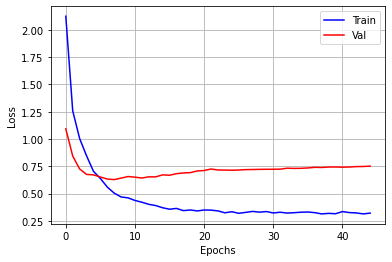

In [63]:

BATCHSIZE = 256
NUMEPOCHS = 45
LEARNINGRATE = 5e-3

import matplotlib.pyplot as plt
import time

min_val_loss = float('inf')

loss_values_train = []
loss_values_val = []

for epoch in range(1,NUMEPOCHS+1):
    start_time = time.time()
    model.train()
    runloss = 0.0
    # training loop, pretty self explanatory
    for i in range(NUM_DATA_POINTS//BATCHSIZE):
        data_input, data_output = train_x[i*BATCHSIZE:(i+1)*BATCHSIZE], train_y[i*BATCHSIZE:(i+1)*BATCHSIZE]
        
        data_input = torch.as_tensor(data_input)
        data_output = torch.as_tensor(data_output)
        
        data_input = data_input.to(device, dtype=torch.float)
        data_output = data_output.to(device, dtype=torch.long)
        
        output = model(data_input) 
        #print(output, data_output)
        loss = criterion(output, data_output)
        runloss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    runloss /= (NUM_DATA_POINTS//BATCHSIZE)
    loss_values_train.append(runloss)
    
    model.eval()
    
    val_loss = 0
    corr = 0
    with torch.no_grad():
        for i in range(NUM_VAL_POINTS//BATCHSIZE):
            val_data_input, val_data_output = val_x[i*BATCHSIZE:(i+1)*BATCHSIZE], val_y[i*BATCHSIZE:(i+1)*BATCHSIZE]

            data_input = torch.as_tensor(val_data_input)
            data_output = torch.as_tensor(val_data_output)

            data_input = data_input.to(device, dtype=torch.float)
            data_output = data_output.to(device, dtype=torch.long)

            output = model(data_input)
            pred = output.argmax(dim=1,keepdim=True)
            #print(pred,data_output)
            #print(pred.eq(data_output.view_as(pred)).sum().item())
            corr += pred.eq(data_output.view_as(pred)).sum().item()

            loss = criterion(output, data_output)
            val_loss += loss.data.item()
            
    # saving model if validation loss is lowest
    val_loss /= NUM_VAL_POINTS//BATCHSIZE
    loss_values_val.append(val_loss)

    if val_loss <= min_val_loss:
        min_val_loss = val_loss
        torch.save(model.state_dict(), 'Model_best_val_quicksave.pt')

    # printing some stuff
    stop_time = time.time()
    time_el = int(stop_time-start_time)
    print('epoch [{}/{}], loss:{:.7f}, val loss:{:.7f}, val acc:{:.7f} in {}h {}m {}s'.format(epoch, NUMEPOCHS,
                                                                                runloss, val_loss, 100*corr/(BATCHSIZE*(NUM_VAL_POINTS//BATCHSIZE)),
                                                                                time_el//3600,
                                                                                (time_el%3600)//60,
                                                                                time_el%60))
    # quicksaving model every epoch if something goes wrong and I want to continue training later
    torch.save(model.state_dict(), 'Model_quicksave.pt')

    scheduler.step()

plt.plot(np.array(loss_values_train), 'b')
plt.plot(np.array(loss_values_val), 'r')
plt.legend(['Train','Val'])
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [64]:
model.load_state_dict(torch.load('Model_best_val_quicksave.pt'))
model.eval()

NUM_TEST_POINTS = len(test_x)

tloss = 0
corr = 0
with torch.no_grad():
    for i in range(NUM_TEST_POINTS//BATCHSIZE):
        test_data_input, test_data_output = test_x[i*BATCHSIZE:(i+1)*BATCHSIZE], test_y[i*BATCHSIZE:(i+1)*BATCHSIZE]

        data_input = torch.as_tensor(test_data_input)
        data_output = torch.as_tensor(test_data_output)

        data_input = data_input.to(device, dtype=torch.float)
        data_output = data_output.to(device, dtype=torch.long)

        output = model(data_input)
        pred = output.argmax(dim=1,keepdim=True)
        corr += pred.eq(data_output.view_as(pred)).sum().item()

        loss = criterion(output, data_output)
        tloss += loss.data.item()
        
tloss /= NUM_TEST_POINTS//BATCHSIZE

print('Test Accuracy: {:.2f}%'.format(100 * corr/(BATCHSIZE*(NUM_TEST_POINTS//BATCHSIZE))))

Test Accuracy: 72.84%
